# Contraintes lors de l'impact pieds joints

Force d’impact: on multiplie le poids de l’utilisateur $W$, par un coefficient $c=10$ (pour l’instant): $F=cW$
A l’atterrissage, la force est répartie sur une longueur $𝑙=200𝑚𝑚$ (largeur moyenne de 2 pieds joints)
On approxime la portion de section étudiée par un cylindre


<img src="https://i.ibb.co/3FLWPb2/Capture-d-e-cran-2019-08-02-a-10-08-46.png" alt="Capture-d-e-cran-2019-08-02-a-10-08-46" border="0"></a>

On cherche donc la contrainte maximale dans l’anneau suivant soumis à une force $0.025F$. <br>
On peut utiliser les formules du livre de Roark sur les poutres courbes, la contrainte dans l'arrête extérieure s'exprime:
$$
\sigma_i=k_i \sigma
$$
Où sigma correspond à la contrainte dans une poutre droite de même longueur et de section identique
$$
\sigma=\frac{Mc}{I_z}
$$
$$I_z=\frac{bd(b^2+d^2)}{12}$$
$$M=\frac{F_2\pi R_m}{4}$$
$$R_m=\frac{r_1+r_2}{2}$$
$$R=\frac{e_a^2}{e_b}$$

<img src="https://i.ibb.co/S0XD33P/Capture-d-e-cran-2019-08-02-a-10-11-26.png" alt="Capture-d-e-cran-2019-08-02-a-10-11-26" border="0"></a>

Le script suivant calcule les contraintes lors d'un impact pieds joints, en multipliant le poids de l'utilisateur par le coefficient $co$ pour tenir compte des effets dynamiques.
Les contraintes sont calculées en fonction de $r_1$ et $r_2$

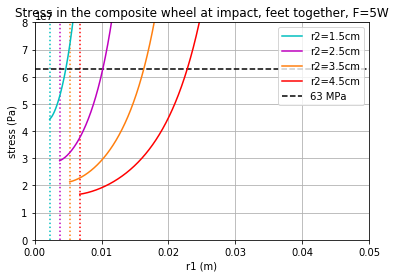

In [2]:
import math as ma
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as sc


Ea=210*10**9
Ec=9*10**9
Ga=79.3*10**9
Gc=3.8*10**9
rhoa=7800
rhoc=1170

g=9.81
W=900

b=0.005

co=10
mu=80.0

F=0.025*co*80*g

def si(r1,r2):
    E=Ec
    G=Gc
    R=(r1+r2)/2
    d=r2-r1
    c=d/2

    Ic = b*d**3 / 12
    Ac = b*d
    Iz = b*d*(b**2 +d**2)/12

    k1 = 1 - Ic / (Ac * R ** 2) + 2 * Ic * E / (G * Ac * R ** 2)
    k2 = 1 - Ic / (Ac * R ** 2)

    ddh = (W * R ** 3 / (E * Ic)) * (0.5 * k1 - k2 + 2 * k2 ** 2 / ma.pi)
    ella = R + ddh / 2

    ddv = W  * R ** 3 / (E * Ic) * (0.25*ma.pi*k1-2*k2**2/ma.pi)
    ellb = R - ddv / 2

    Rc = ella ** 2 / ellb

    Wt = F
    M = Wt * ma.pi * R / 4
    sigma = M * r2 / Iz

    ec=R/c - 2/np.log((R/c + 1)/(R/c-1))
    ki=1/(3*ec) * (1-ec)/(R/c-1)

    si = ki * sigma
    return(si)

r1l1=np.linspace(0.15*0.015,0.013,1000)
r1l2=np.linspace(0.15*0.025,0.0249,1000)
r1l3=np.linspace(00.15*0.035,0.0349,1000)
r1l4=np.linspace(0.15*0.045,0.0449,1000)


plt.plot(r1l1,si(r1l1,0.015),'c',label='r2=1.5cm')
plt.plot(r1l2,si(r1l2,0.025),'m',label='r2=2.5cm')
plt.plot(r1l3,si(r1l3,0.035),'C1',label='r2=3.5cm')
plt.plot(r1l4,si(r1l4,0.045),'r',label='r2=4.5cm')

plt.vlines(0.15*0.015,0.0,8*10**7,'c',linestyle=':')
plt.vlines(0.15*0.025,0.0,8*10**7,'m',linestyle=':')
plt.vlines(0.15*0.035,0.0,8*10**7,'C1',linestyle=':')
plt.vlines(0.15*0.045,0.0,8*10**7,'r',linestyle=':')

plt.hlines(63*10**6,0.0,0.05,'k',linestyle='--', label='63 MPa')

plt.xlim(0.0,0.05)
plt.ylim(0.0,8*10**7)

plt.legend(loc='best')
plt.xlabel('r1 (m)')
plt.ylabel('stress (Pa)')
plt.title('Stress in the composite wheel at impact, feet together')

plt.grid()
plt.show()


# Impact pieds écartés

Ce cas correspond à la flexion 3 points d'une poutre incurvée. De même, on calcule la contrainte en remplaçant notre poutre par une poutre droite, puis on multiplie le résultat par le coefficient $k_i$ calculé à l'aide du livre de Roark.

$$\sigma=\frac{FL}{4S}$$
$$S=\frac{\pi(r_2^4-r_1^4)}{4r_2}$$


<img src="https://i.ibb.co/Jj379n3/Capture-d-e-cran-2019-08-02-a-10-23-13.png" alt="Capture-d-e-cran-2019-08-02-a-10-23-13" border="0">

Le script suivant calcule les contraintes lors d'un impact pieds écartés, en multipliant le poids de l'utilisateur par le coefficient $co$ pour tenir compte des effets dynamiques.
Les contraintes sont calculées en fonction de $r_1$ et $r_2$
La longueur de la poutre correspond à l'écartement des deux pieds de l'utilisateur. 

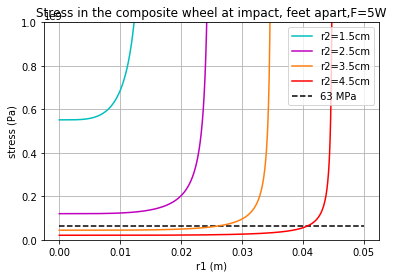

In [4]:
import math as ma
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as sc


Ea=210*10**9
Ec=9*10**9
Ga=79.3*10**9
Gc=3.8*10**9
rhoa=7800
rhoc=1170
R=0.9375

g=9.81
W=900

co=5
mu=80.0

F=co*80*g

def si(r1,r2):
    L=np.pi*R/2
    S=np.pi*(r2**4-r1**4)/(4*r2)
    si=F*L/(4*S)

    Ic = ma.pi * 0.25 * (r2 ** 4 - r1 ** 4)
    Ac = ma.pi * (r2 ** 2 - r1 ** 2)
    Iz = ma.pi * 0.5 * (r2 ** 4 - r1 ** 4)

    k1 = 1 - Ic / (Ac * R ** 2) + 2 * Ic * Ec / (Gc * Ac * R ** 2)
    k2 = 1 - Ic / (Ac * R ** 2)

    ddh = (W * R ** 3 / (Ec * Ic)) * (0.5 * k1 - k2 + 2 * k2 ** 2 / ma.pi)
    ella = R + ddh / 2

    ddv = W * R ** 3 / (Ec * Ic) * (0.25 * ma.pi * k1 - 2 * k2 ** 2 / ma.pi)
    ellb = R - ddv / 2

    #Rc = ellb ** 2 / ella

    Rc=R

    ec = 0.5 * (2 * Rc / r2 - np.sqrt((Rc / r2) ** 2 - 1) - np.sqrt((Rc / r2) ** 2 - (r1 / r2) ** 2))
    ki = 0.25 / ec * ((1 - ec) / (Rc / r2 - 1)) * (1 + (r1 / r2) ** 2)

    sic=si*ki

    return(sic)

r1l1=np.linspace(0.0,0.013,1000)
r1l2=np.linspace(0.0*0.025,0.0249,1000)
r1l3=np.linspace(0.0,0.0349,1000)
r1l4=np.linspace(0.0*0.045,0.0449,1000)


plt.plot(r1l1,si(r1l1,0.015),'c',label='r2=1.5cm')
plt.plot(r1l2,si(r1l2,0.025),'m',label='r2=2.5cm')
plt.plot(r1l3,si(r1l3,0.035),'C1',label='r2=3.5cm')
plt.plot(r1l4,si(r1l4,0.045),'r',label='r2=4.5cm')

#plt.vlines(0.15*0.015,0.0,8*10**7,'c',linestyle=':')
#plt.vlines(0.15*0.025,0.0,8*10**7,'m',linestyle=':')
#plt.vlines(0.15*0.035,0.0,8*10**7,'C1',linestyle=':')
#plt.vlines(0.15*0.045,0.0,8*10**7,'r',linestyle=':')

plt.hlines(63*10**6,0.0,0.05,'k',linestyle='--', label='63 MPa')

plt.ylim(-0.01,1.0*10**9)

plt.legend(loc='best')
plt.xlabel('r1 (m)')
plt.ylabel('stress (Pa)')
plt.title('Stress in the composite wheel at impact, feet apart')

plt.grid()
plt.show()